<a href="https://colab.research.google.com/github/Bookmaster9/watlowintern/blob/RandomForest/Randomforest4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
data = pd.read_csv('/content/gdrive/MyDrive/fullyprocessedv2.csv')
data.head()

,LV Input (VAC),HV Input (VAC),Current (AAC),Leakage (MA),sn side 10 in (C),sn side 5 in (C),center (C),side 5 in (C),side 10 in (C),HV Out (VAC),LV Out (VAC),Power (WAT),Status,averagetemps,OperationTime_until_failure
0,0.140338,1.67805,-0.003939,0.032422,22.023,22.012,531.098,22.124,22.109,25.053286,0.138795,-0.000547,0,123.8732,4778599.985
1,0.137785,1.67549,-0.003914,0.032295,22.007,22.012,311.510,22.105,22.140,25.015066,0.136269,-0.000533,0,79.9548,4778595.985
2,0.140338,1.67677,-0.003914,0.032487,22.006,22.001,536.150,22.110,22.113,25.034176,0.138795,-0.000543,0,124.8760,4778571.985
3,0.136508,1.67677,-0.003914,0.032422,22.006,21.975,646.558,22.107,22.129,25.034176,0.135006,-0.000528,0,146.9550,4778567.985
4,0.136508,1.67549,-0.003965,0.032487,22.018,21.994,838.220,22.122,22.113,25.015066,0.135006,-0.000535,0,185.2934,4778563.985


In [7]:
from sklearn.model_selection import train_test_split
import numpy as np

# labels = np.array(data["Cycles_until_failure"])
# features = np.array(data.iloc[:,:-1])
# Split the data into training and testing sets
# train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.2, random_state = 42)
# print('Training Features Shape:', train_features.shape)
# print('Training Labels Shape:', train_labels.shape)
# print('Testing Features Shape:', test_features.shape)
# print('Testing Labels Shape:', test_labels.shape)
train_dataset = data.iloc[0:1676351]
test_dataset = data.drop(train_dataset.index)
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('OperationTime_until_failure')
test_labels = test_features.pop('OperationTime_until_failure')
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (1676351, 14)
Training Labels Shape: (1676351,)
Testing Features Shape: (419088, 14)
Testing Labels Shape: (419088,)


In [8]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 40, random_state = 42, verbose = 3)
# Train the model on training data
rf.fit(train_features, train_labels);

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 40


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   51.8s remaining:    0.0s


building tree 2 of 40


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  1.6min remaining:    0.0s


building tree 3 of 40
building tree 4 of 40
building tree 5 of 40
building tree 6 of 40
building tree 7 of 40
building tree 8 of 40
building tree 9 of 40
building tree 10 of 40
building tree 11 of 40
building tree 12 of 40
building tree 13 of 40
building tree 14 of 40
building tree 15 of 40
building tree 16 of 40
building tree 17 of 40
building tree 18 of 40
building tree 19 of 40
building tree 20 of 40
building tree 21 of 40
building tree 22 of 40
building tree 23 of 40
building tree 24 of 40
building tree 25 of 40
building tree 26 of 40
building tree 27 of 40
building tree 28 of 40
building tree 29 of 40
building tree 30 of 40
building tree 31 of 40
building tree 32 of 40
building tree 33 of 40
building tree 34 of 40
building tree 35 of 40
building tree 36 of 40
building tree 37 of 40
building tree 38 of 40
building tree 39 of 40
building tree 40 of 40


[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed: 28.6min finished


In [9]:
from sklearn.metrics import r2_score
predictedvalues = rf.predict(test_features)
print(r2_score(test_labels,predictedvalues))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


-0.5478065107534991


[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    1.2s finished


In [10]:
a = pd.DataFrame()
a['test_labels'] = test_labels
a['pred_labels'] = predictedvalues
a.to_csv('/content/gdrive/MyDrive/randomforestpredictions3.csv')

In [ ]:
import pickle
pickle.dump(rf, open('/content/gdrive/MyDrive/secondrandomforest.pkl', 'wb'))

In [15]:
df = pd.read_csv("/content/gdrive/MyDrive/randomforestpredictions3.csv")
a = df['test_labels']
b = df['pred_labels']
count = 0
for i in range(len(a)):
  if b[i]> (a[i] - 60000) and b[i] < (a[i] +60000):
    count +=1
print(count/len(test_labels))


0.05600733020272592


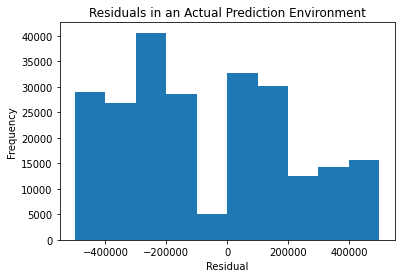

In [19]:
import matplotlib.pyplot as plt
residuals = []
for i in range(len(a)):
    residuals.append(b[i]-a[i])
plt.hist(residuals, bins=[-500000,-400000,-300000,-200000,-100000,0,100000,200000,300000,400000,500000])
plt.title("Residuals in an Actual Prediction Environment")
plt.ylabel("Frequency")
plt.xlabel("Residual")
plt.show()

In [14]:
import numpy as np
  
# Given values
Y_true = test_labels
  
# Calculated values
Y_pred = predictedvalues
  
# Mean Squared Error
MSE = (np.square(np.subtract(Y_true,Y_pred))).mean()
print(MSE)

460230003768.1123
